# Données
Les données considérées est l'aggrégation de relevé météo s'étendant sur 10 années à partir de différentes station météo.


## Relevés météo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import pandas as pd
df=pd.read_csv('enricheredaus_sanscluster.csv',index_col=0, parse_dates=['Date'])
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,qtyraintomorrow,varpressure,vartemp,varwind
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,No,0.0,NaN,NaN,NaN
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,No,0.0,0.7,2.5,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,No,0.0,0.9,-1.1,2.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,No,1.0,4.1,3.3,-22.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,0.2,-6.8,3.2,17.0


In [19]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'qtyraintomorrow',
       'varpressure', 'vartemp', 'varwind'],
      dtype='object')

# Analyse des données

## Données non disponibles

Text(0, 0.5, 'Variables')

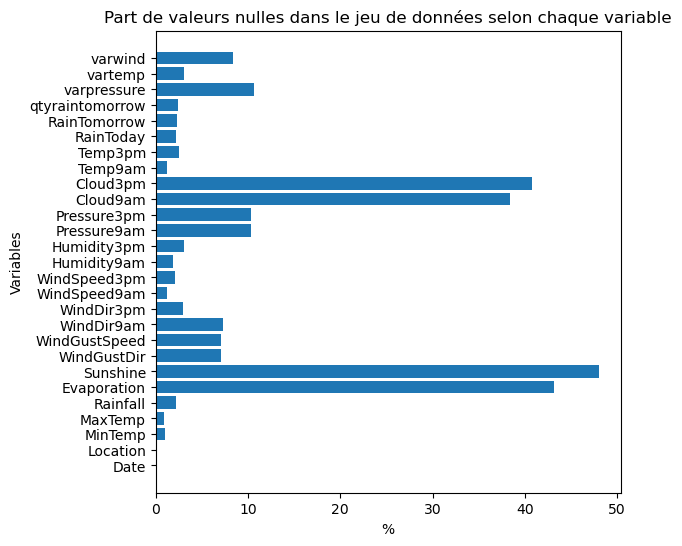

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

df_poids_na=((df.isna().sum()/ df.index.size)*100).round(2)
df_poids_na=pd.DataFrame(df_poids_na)
fig = plt.figure(1, figsize=(6, 6))
plt.barh(df_poids_na.index, df_poids_na[0])
plt.title("Part de valeurs nulles dans le jeu de données selon chaque variable")
plt.xlabel("%", size = 10,)
plt.ylabel("Variables", size = 10)

## Correlation entre les variables

In [21]:
#Supression des lignes avec au moins une valeur nulle
df_test_corr=df.dropna (axis = 0, how = 'any', thresh = None, subset = None, inplace = False)

#Remplacement des valeurs texte par des valeurs numériques

df_test_corr['RainToday'].replace({'No': 0}, inplace=True)
df_test_corr['RainToday'].replace({'Yes': 1}, inplace=True)
df_test_corr['RainTomorrow'].replace({'No': 0}, inplace=True)
df_test_corr['RainTomorrow'].replace({'Yes': 1}, inplace=True)
df_test_corr['RainToday'].astype('int64')
df_test_corr['RainTomorrow'].astype('int64')

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_test_corr['Location'])
df_test_corr['Location']=le.transform(df_test_corr['Location'])
le.fit(df_test_corr['WindGustDir'])
df_test_corr['WindGustDir']=le.transform(df_test_corr['WindGustDir'])
le.fit(df_test_corr['WindDir9am'])
df_test_corr['WindDir9am']=le.transform(df_test_corr['WindDir9am'])
le.fit(df_test_corr['WindDir3pm'])
df_test_corr['WindDir3pm']=le.transform(df_test_corr['WindDir3pm'])


/tmp/ipykernel_380/2650519410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_corr['RainToday'].replace({'No': 0}, inplace=True)
/tmp/ipykernel_380/2650519410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_corr['RainToday'].replace({'Yes': 1}, inplace=True)
/tmp/ipykernel_380/2650519410.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_corr['RainTomorrow'].replace({'No': 0}, inplace=True)
/tmp/ipykern

<AxesSubplot:>

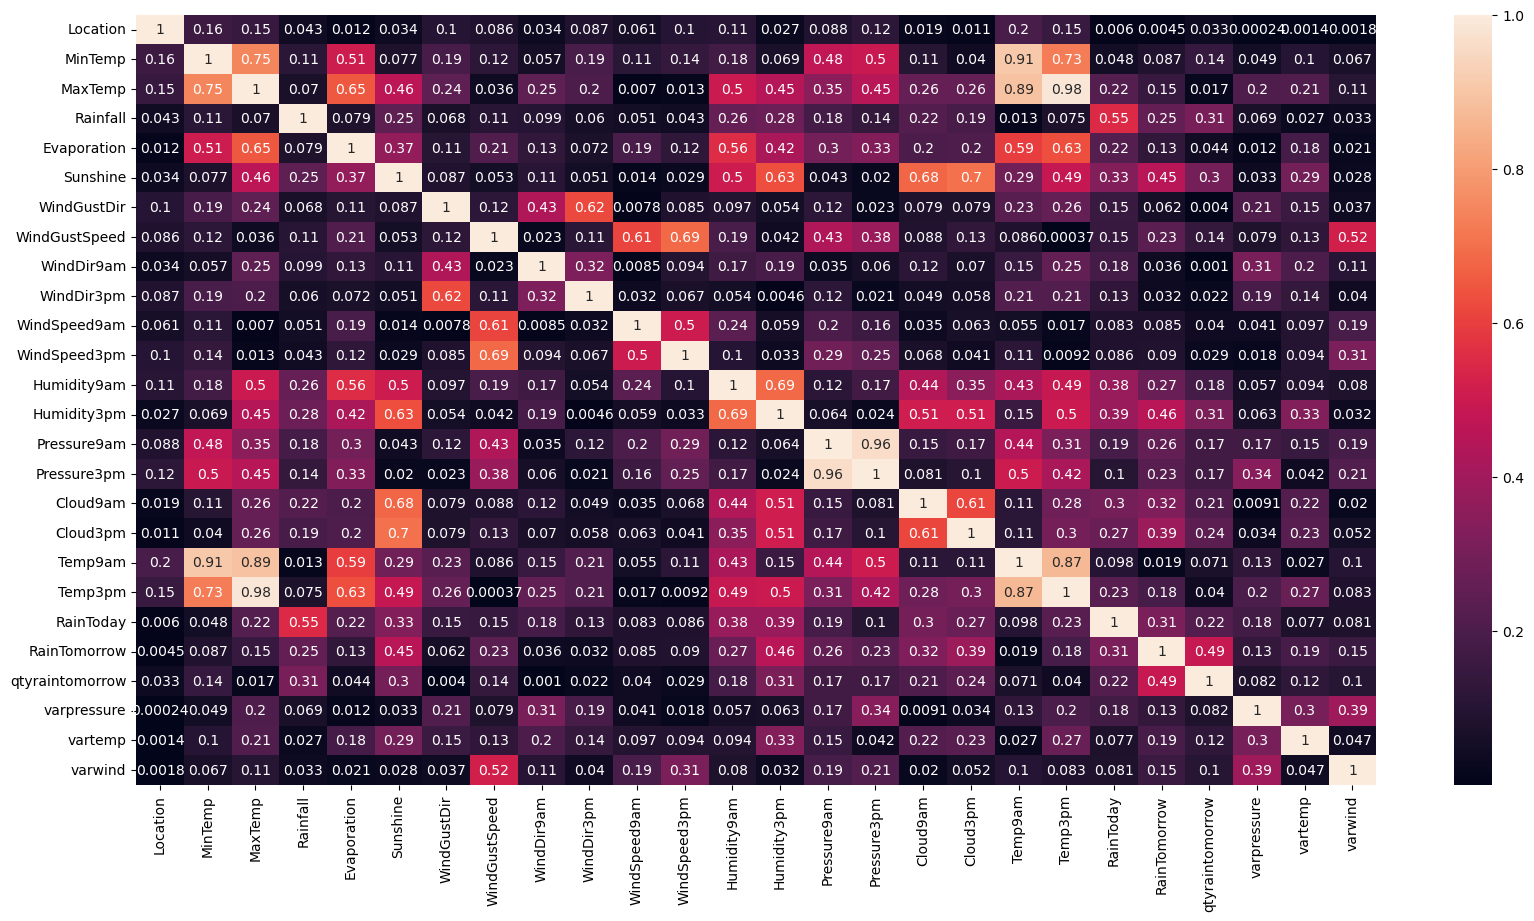

In [22]:
#On effectue le test de correlation
import seaborn as sns
correlation=abs(df_test_corr.corr())
plt.figure(figsize = (20,10))
sns.heatmap(correlation, annot=True)

La variable RainTomorrow est corrélé à Humidity3pm, Sunshine et Cloud3pm. Or pour les 2 dernières variables on a vu plus haut que plus de 40% des lignes ont une valeur manquante.

## Données géographiques
En outre, on fournit ici les données gégrophique prise sur internet des différentes station météo. 

In [23]:
locations={'Albury': (-36.083333333333336, 146.95),
 'BadgerysCreek': (-33.87972222222222, 150.75222222222223),
  'Cobar': (-31.483333333333334, 145.8), 'CoffsHarbour': (-30.3, 153.11666666666667), 'Moree': (-29.466666666666665, 149.83333333333334), 'Newcastle': (-32.93333333333333, 151.73333333333332), 'NorahHead': (-33.2825, 151.57416666666666), 'NorfolkIsland': (-29.03, 167.95), 'Penrith': (-33.75, 150.71666666666667), 'Richmond': (-37.823, 144.998), 'Sydney': (-33.85611111111111, 151.1925), 'SydneyAirport': (-33.925900320771255, 151.18998051518105), 'WaggaWagga': (-35.13, 147.3536111111111), 'Williamtown': (-32.815, 151.8427777777778), 'Wollongong': (-34.42722222222222, 150.89388888888888), 'Canberra': (-35.293055555555554, 149.12694444444446), 'Tuggeranong': (-35.4244, 149.0888), 'MountGinini': (-35.53333333333333, 148.78333333333333), 'Ballarat': (-37.56083333333333, 143.8475), 'Bendigo': (-36.75, 144.26666666666668), 'Sale': (-38.1, 147.06666666666666), 'MelbourneAirport': (-37.81666666666667, 144.96666666666667), 'Melbourne': (-37.81666666666667, 144.96666666666667), 'Mildura': (-34.18888888888888, 142.15833333333333), 'Nhil': (-36.333333333333336, 141.65), 'Portland': (-38.333333333333336, 141.6), 'Watsonia': (-37.708, 145.083), 'Dartmoor': (-37.93333333333333, 141.28333333333333), 'Brisbane': (-27.467777777777776, 153.02805555555557), 'Cairns': (-16.92, 145.78), 'GoldCoast': (-28.02583333333333, 153.38972222222222), 'Townsville': (-19.25, 146.8), 'Adelaide': (-34.93, 138.59972222222223), 'MountGambier': (-37.82944444444445, 140.7827777777778), 'Nuriootpa': (-34.46666666666667, 138.98333333333332), 'Woomera': (-31.2, 136.81666666666666), 'Albany': (-35.016666666666666, 117.88333333333334), 'Witchcliffe': (-34.03, 115.1), 'PearceRAAF': (-31.66777777777778, 116.015), 'PerthAirport': (-31.942222222222224, 115.95583333333333), 'Perth': (-31.95, 115.86666666666666), 'SalmonGums': (-32.98, 121.645), 'Walpole': (-34.98, 116.7), 'Hobart': (-42.88583333333333, 147.33138888888888), 'Launceston': (-41.43333333333333, 147.13333333333333), 'AliceSprings': (-23.702222222222222, 133.87666666666667), 'Darwin': (-12.436111111111112, 130.84111111111113), 'Katherine': (-14.466666666666667, 132.26666666666668), 'Uluru': (-25.345, 131.0363888888889)}

On voit ici la liste des stations météo qui ont été observées.

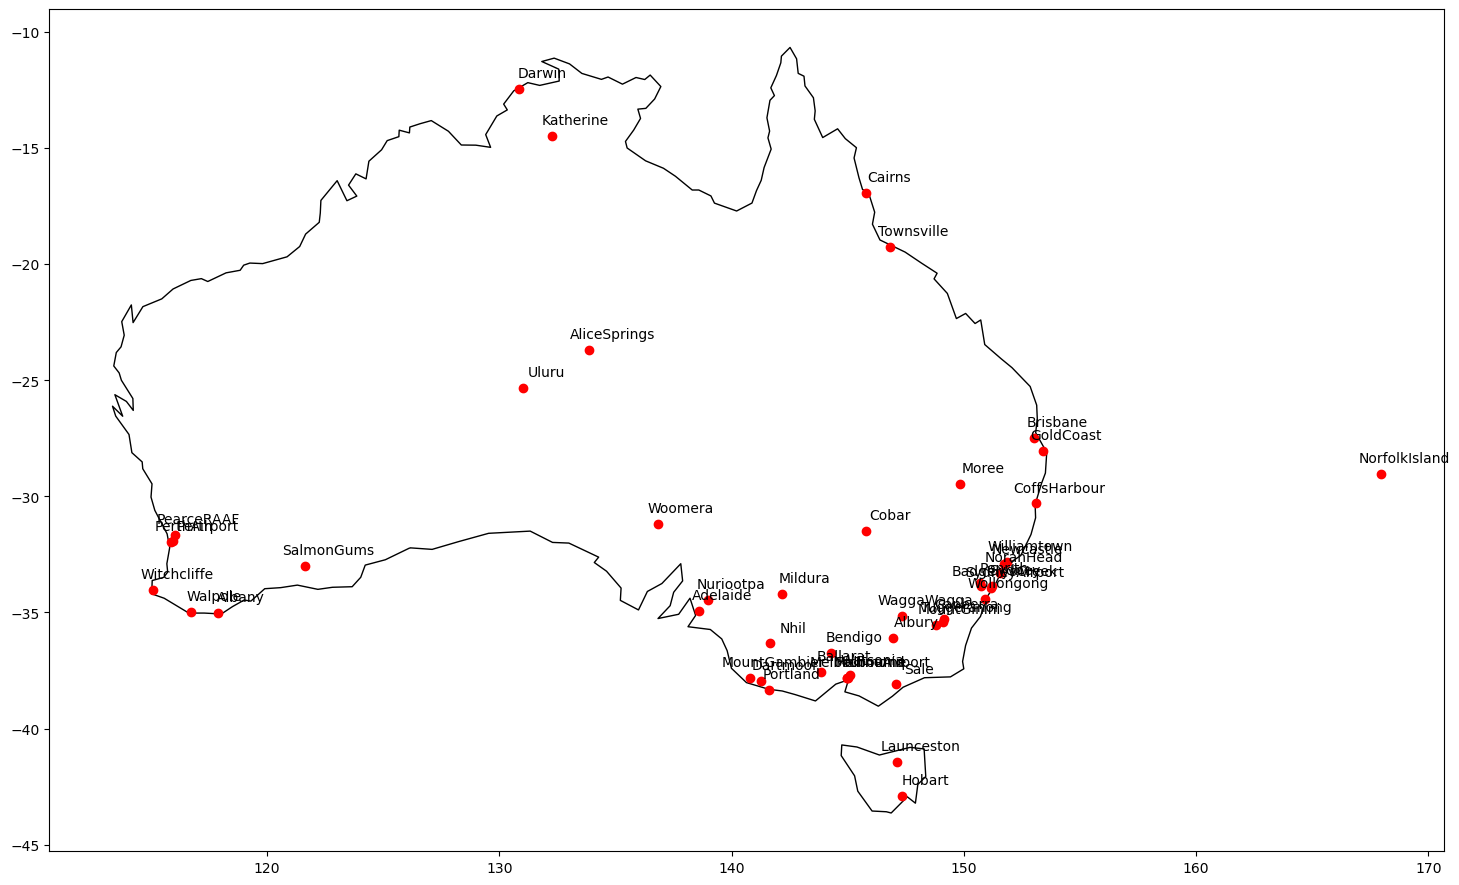

In [24]:
import geopandas as gpd
import pandas as pd

stationsmeteos=pd.DataFrame.from_dict(locations, orient='index')
gdf = gpd.GeoDataFrame(
    stationsmeteos, geometry=gpd.points_from_xy(stationsmeteos[1], stationsmeteos[0]))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America. 
ax = world[world.name == 'Australia'].plot(
    color='white', edgecolor='black',figsize=(18,12))
gdf.plot(ax=ax, color='red')



for index,row in stationsmeteos.iterrows():
    plt.annotate(text=index, xy=(row[1]+1,row[0]+.5),
                 horizontalalignment='center')


### Periode d'observation

In [25]:
print(df.groupby('Location')['Date'].agg(['min','max']))

print('Il n\'y a pas d\'implantation de station météo récente : toutes les stations sont a considére de ce point de vue')

                        min        max
Location                              
Adelaide         2008-07-01 2017-06-25
Albany           2008-12-01 2017-06-25
Albury           2008-12-01 2017-06-25
AliceSprings     2008-12-01 2017-06-25
BadgerysCreek    2009-01-01 2017-06-25
Ballarat         2008-12-01 2017-06-25
Bendigo          2008-12-01 2017-06-25
Brisbane         2008-07-01 2017-06-25
Cairns           2008-12-01 2017-06-25
Canberra         2007-11-01 2017-06-25
Cobar            2009-01-01 2017-06-25
CoffsHarbour     2009-01-01 2017-06-25
Dartmoor         2009-01-01 2017-06-25
Darwin           2008-07-01 2017-06-25
GoldCoast        2008-12-01 2017-06-25
Hobart           2008-07-01 2017-06-25
Katherine        2013-03-01 2017-06-25
Launceston       2008-12-01 2017-06-25
Melbourne        2008-07-01 2017-06-25
MelbourneAirport 2009-01-01 2017-06-25
Mildura          2009-01-01 2017-06-25
Moree            2009-01-01 2017-06-25
MountGambier     2008-12-01 2017-06-25
MountGinini      2008-12-

In [26]:
print("Nombre de station météo",len((df.Location).unique()))

Nombre de station météo 49


Les données manquantes sont pricipalement de type ensoleillement et évaporation sont manifestement liées à la station météo qui ne serait pas équipée d'un capteur. Une question à se poser est de savoir quelle serait la taille de notre dataset si nous ne considérions que les stations ayant un capteur d'ensoleillement.

In [28]:
dataavailability=df[['Location']].join(df.iloc[:,2:].isna()).groupby('Location').sum()/df[['Location']].join(df.iloc[:,2:].isna()).groupby('Location').count()
# Filtrage des stations méteo qui ont au moins 80% de données manquante sur l'ensoleillement
villewosunhinecaptor=dataavailability[dataavailability['Sunshine']>.8].reset_index()['Location']
#villewosunhinecaptor.unique()
print("Station météo sans capteur solaire : ",*villewosunhinecaptor)

dfwithsunshine=df.loc[~df['Location'].isin(villewosunhinecaptor), :]
print("Taille du dataset initial",len(df))
print("Taille du dataset si nous ne considérons que les stations météos avec capteur d'ensolleillement", len(dfwithsunshine))

Station météo sans capteur solaire :  Albury BadgerysCreek Ballarat Bendigo Cobar GoldCoast Katherine Launceston MountGinini Newcastle Nhil NorahHead Penrith Richmond SalmonGums Tuggeranong Uluru Walpole Witchcliffe Wollongong
Taille du dataset initial 145460
Taille du dataset si nous ne considérons que les stations météos avec capteur d'ensolleillement 89282


Tentons maintenant de savoir si cette reduction induirait un biais signification (Nous ne pourrions plus observer tous les types de climats)

L'absence de captage de l'ensoleillement n'a pas d'impact sur la représentativité géographique


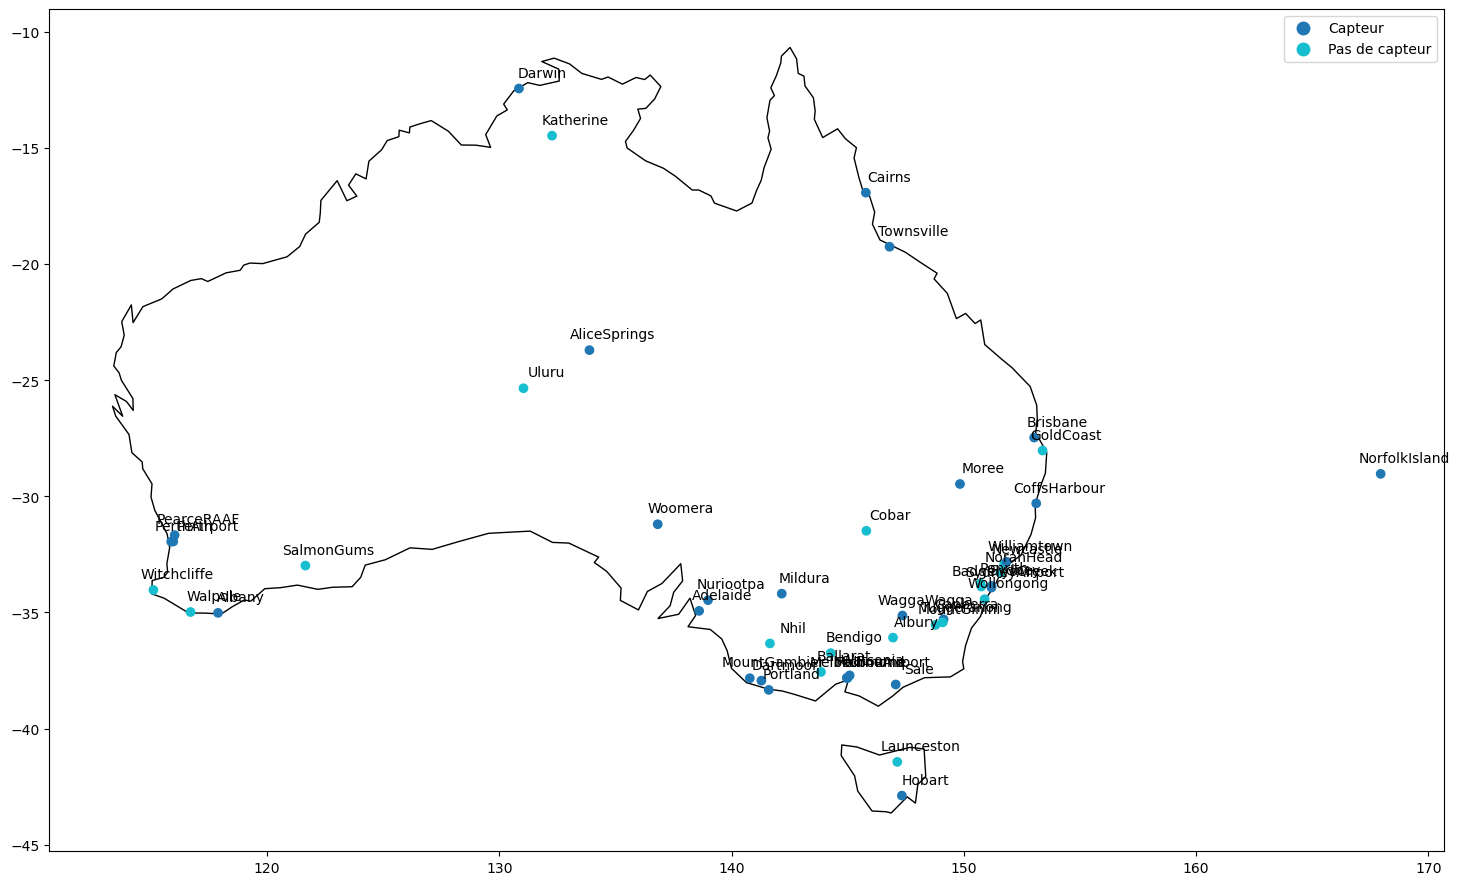

In [32]:
import geopandas as gpd
import pandas as pd

stationsmeteos=pd.DataFrame.from_dict(locations, orient='index')
#stationsmeteos.reset_index(inplace=True)
stationsmeteos.rename(columns={'index':'Location',0:'Lat',1:'Long'},inplace=True)

stationsmeteos['hassunhine']=stationsmeteos.index.isin(villewosunhinecaptor)
stationsmeteos['hassunhine'].replace({True:'Pas de capteur',False:"Capteur"},inplace=True)
#stationsmeteos['hassunhine']=stationsmeteos.iloc[stationsmeteos.['Location'].isin(villewosunhinecaptor),:].replace({True:'Pas de capteur',False:"Capteur"})
gdf = gpd.GeoDataFrame(
    stationsmeteos, geometry=gpd.points_from_xy(stationsmeteos['Long'], stationsmeteos['Lat']))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.name == 'Australia'].plot(
    color='white', edgecolor='black',figsize=(18,12))
gdf.plot(ax=ax, column='hassunhine', legend=True, categorical=True)

for index,row in stationsmeteos.iterrows():
    plt.annotate(text=index, xy=(row['Long']+1,row['Lat']+.5),
                 horizontalalignment='center')

#Les stations sans relevé d'ensoleillement sont en violet.
print("L'absence de captage de l'ensoleillement n'a pas d'impact sur la représentativité géographique")

## Diagrammes pluviométriques
Les diagramme pluviométriques sont couramment utilisé pour caractériser les climats. L'idée est d'introduire une catégorisation des climats en utilisant ces shémas. 

AxesSubplot(0.566569,0.155278;0.352924x0.277685)
<class 'int'>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


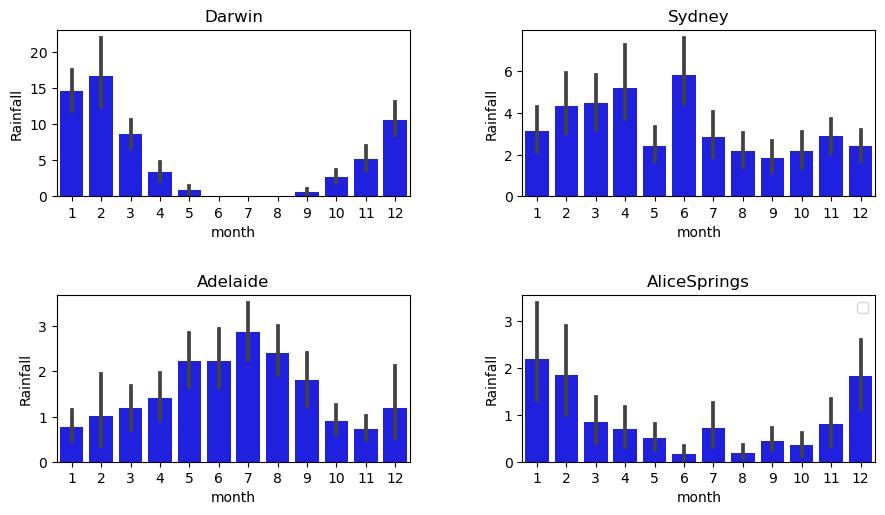

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
df['month']=pd.to_datetime(df['Date']).dt.month

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,6))
fig.tight_layout(pad=5)
print(axes[1,1])
i=0

print(type(i%2))
for ville in ['Darwin','Sydney','Adelaide','AliceSprings']:
    ax=axes[i//2,i%2]
    rain=df[df['Location']==ville][['Date','Rainfall']]
    rain['month']=rain['Date'].apply(lambda x: x.month)
    ax.set_title(ville)
    sns.barplot(x='month', y='Rainfall',data=rain,ax=ax,color='b')  
    i+=1
    
plt.legend()
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity9am'>

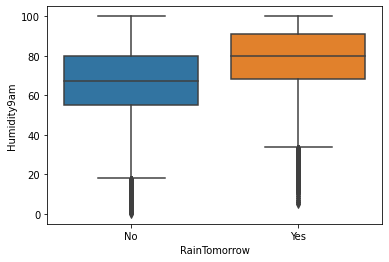

In [19]:
sns.boxplot(df.RainTomorrow,df.Humidity9am)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='Sunshine'>

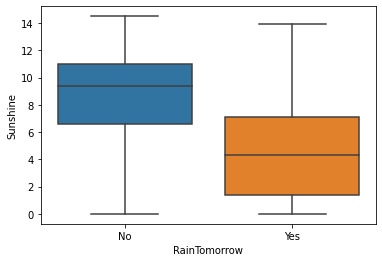

In [18]:
sns.boxplot(df.RainTomorrow,df.Sunshine)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp3pm'>

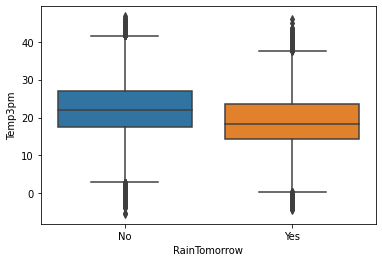

In [22]:
sns.boxplot(df.RainTomorrow,df.Temp3pm)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Influence de la température sur la pluie du lendemain à Adélaide')]

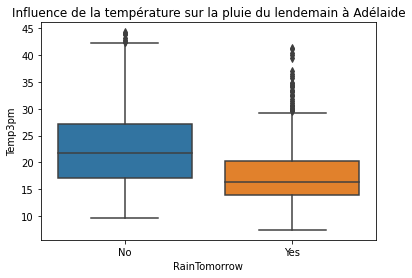

In [30]:
sns.boxplot( "RainTomorrow","Temp3pm",data=df.loc[df.Location=="Adelaide"]).set(title='Influence de la température sur la pluie du lendemain à Adélaide')


In [79]:
polygonaustralia.geometry

137    MULTIPOLYGON (((147.68926 -40.80826, 148.28907...
Name: geometry, dtype: geometry

Clairement, nous distinguons différents types de climats dans ces diagrammes. Nous allons essayer d'identifier les types climats à l'aide de l'algoritme KMean employé sur la variable climate signature (vecteur uniquement sur la pluviométrie). 

Chaque climat identifié pourrait être associé à un prédicteur distinct suivant cette catégorisation.

In [39]:
from sklearn.cluster import KMeans
km3 = KMeans(n_clusters=4).fit(climatesignature)
climatesignature['Labels'] = km3.labels_


NameError: name 'climatesignature' is not defined

In [15]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [35]:
import geopandas as gpd
import pandas as pd

#stationsmeteos=pd.DataFrame.from_dict(locations, orient='index')
stationsmeteos=stationsmeteos.join(climatesignature['Labels'])
gdf = gpd.GeoDataFrame(
    stationsmeteos, geometry=gpd.points_from_xy(stationsmeteos["Long"], stationsmeteos["Lat"]))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'Australia'].plot(
    color='white', edgecolor='black',figsize=(18,12))
gdf.plot(ax=ax, column='Labels',categorical=True, legend=True)


NameError: name 'stationsmeteos' is not defined

Logiquement, les facteurs déterminant du climats sont géographiques. Ici, on distingue trois paramêtres déterminants. 
- La latitude
- La position continentale ou côtière
- L'exposition aux vents côtiers (orientation de la côte)

## Nettoyage et preparation

Creation de colonnes et assignation de dtype

In [17]:

df['RainToday']=df['RainToday'].replace({'No':0,'Yes':1})
df['RainTomorrow']=df['RainTomorrow'].replace({'No':0,'Yes':1})
df['Date']=pd.to_datetime(df['Date'])
df['month']=pd.DatetimeIndex(df['Date']).month


In [18]:
print(type(df['Date'][1].to_pydatetime()))
print(type(datetime.fromisoformat('2008-12-02')))
print(type((df['Date'][1] +  pd.DateOffset(1)).to_pydatetime()))
tomorrow=(df['Date'][1] +  pd.DateOffset(1)).to_pydatetime()
#df.loc[[(df['Date']==datetime.fromisoformat('2008-12-02')) & (df['Location']==location)],'Rainfall']

<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>


## Boucle pour remplir les quantité de pluie du lendemain

In [19]:
df.to_csv("weatherraintomorrowwithquaty.csv")

In [20]:

#dfnorth=df.loc[df['Location'].isin(stationsmeteos.loc[stationsmeteos['hassunhine']=='Capteur'& stationsmeteos['Labels']=='3'],]
stationnord=stationsmeteos.loc[(stationsmeteos['hassunhine']=='Capteur') & (stationsmeteos['Labels']==2 ),:].index
stationsud=stationsmeteos.loc[(stationsmeteos['hassunhine']=='Capteur') & (stationsmeteos['Labels']==3 ),:].index
stationcont=stationsmeteos.loc[(stationsmeteos['hassunhine']=='Capteur') & (stationsmeteos['Labels']==0 ),:].index
stationest=stationsmeteos.loc[(stationsmeteos['hassunhine']=='Capteur') & (stationsmeteos['Labels']==1 ),:].index

dfnord=df.loc[(df['Location'].isin(stationnord))&(~df['RainTomorrow'].isna())]



dfsud=df.loc[(df['Location'].isin(stationsud))&(~df['RainTomorrow'].isna())]
dfest=df.loc[(df['Location'].isin(stationest))&(~df['RainTomorrow'].isna())]
dfcont=df.loc[(df['Location'].isin(stationcont))&(~df['RainTomorrow'].isna())]

print("Taille nord",len(dfnord))
print("Taille sud",len(dfsud))
print("Taille est",len(dfest))
print("Taille continent",len(dfcont))

Taille nord 9213
Taille sud 20949
Taille est 38999
Taille continent 17973


Ajouter les précipitations du jour suivant

Supprimer les na

In [21]:
dfnordsansna=dfnord.dropna()

print("Taille nord sans na ",len(dfnordsansna))


Taille nord sans na  7925


# Prediction
## Le nord

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/tmp/ipykernel_98/1049545984.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitation['Date']=pd.to_datetime(precipitation['Date'])


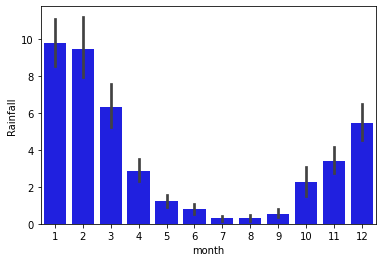

In [22]:
#dfnord.info()
#print(dfnord.isna().sum())

dfnord=df.loc[(df['Location'].isin(stationnord)) &(~df['RainTomorrow'].isna())]


len(dfnord.loc[dfnord['Sunshine'].isna(),:])
len(dfnord.loc[dfnord['RainTomorrow'].isna(),:])

dfnordavgrain=dfnord.groupby('month')['Rainfall'].agg("mean")
dfnordavgrain.name= 'avgrain'
dfnord=dfnord.join(dfnordavgrain,on='month')
dfnord=dfnord.join(pd.get_dummies(dfnord['WindDir3pm']))



sns.barplot(dfnordsansna['month'], dfnordsansna['Rainfall'],color='blue')
#sns.countplot(dfnordsansna['month'])
precipitation=dfnord[['Date','Rainfall']]
precipitation['Date']=pd.to_datetime(precipitation['Date'])


In [23]:
dfnordsansna

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,year
87200,2008-12-01,Cairns,25.2,32.3,0.4,4.0,6.4,NE,31.0,E,...,1011.3,1008.1,5.0,7.0,31.2,30.7,0.0,1.0,12,2008
87201,2008-12-02,Cairns,24.2,32.3,8.4,6.6,5.3,NE,35.0,S,...,1011.9,1008.0,7.0,7.0,29.0,31.1,1.0,0.0,12,2008
87202,2008-12-03,Cairns,23.9,32.8,0.6,5.6,11.3,SSE,31.0,SSE,...,1012.2,1009.9,7.0,5.0,29.1,31.6,0.0,0.0,12,2008
87203,2008-12-04,Cairns,22.2,33.6,0.0,9.6,12.3,SE,39.0,SSE,...,1013.3,1010.9,2.0,1.0,29.6,32.5,0.0,0.0,12,2008
87204,2008-12-05,Cairns,23.2,33.5,0.0,11.6,11.8,SE,43.0,SSE,...,1013.8,1011.0,4.0,2.0,29.7,32.2,0.0,0.0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,1013.9,1010.5,0.0,1.0,24.5,32.3,0.0,0.0,6,2017
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,1014.6,1011.2,7.0,0.0,24.8,32.0,0.0,0.0,6,2017
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,1015.3,1011.8,0.0,0.0,24.8,32.1,0.0,0.0,6,2017
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,1014.9,1010.7,1.0,1.0,24.8,29.2,0.0,0.0,6,2017


In [24]:
from sklearn.model_selection import train_test_split,  cross_validate, KFold
#Modele sans vent
#columnstoconsider=[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
#       'Sunshine',  'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
#       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'NNW' ,'NW', 'S','SE','SSE' ,'SSW','SW', 'W', 'WNW','WSW']
#columnstoconsider=[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
#       'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
#       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
columnstoconsider=[ 'Sunshine',  'Humidity3pm','Pressure3pm', 'Cloud3pm','WindContr','MaxTemp','month']



Xsansna=dfnordsansna[columnstoconsider]
ysansna=dfnordsansna['RainTomorrow']

#plt.boxplot([list(dfnordsansna.loc[dfnordsansna['RainTomorrow']==0,"Sunshine"]),list(dfnordsansna.loc[dfnordsansna['RainTomorrow']==1,"Sunshine"])])
#plt.boxplot([list(dfnordsansna.loc[dfnordsansna['RainTomorrow']==0,"Pressure3pm"]),list(dfnordsansna.loc[dfnordsansna['RainTomorrow']==1,"Pressure3pm"])])
#plt.boxplot([list(dfnordsansna.loc[dfnordsansna['RainTomorrow']==0,"Humidity3pm"]),list(dfnordsansna.loc[dfnordsansna['RainTomorrow']==1,"Humidity3pm"])])

dfnordsansna['diffpres']=dfnordsansna['Pressure9am']-dfnordsansna['Pressure3pm']

plt.boxplot([list(dfnordsansna.loc[dfnordsansna['RainTomorrow']==0,"diffpres"]),list(dfnordsansna.loc[dfnordsansna['RainTomorrow']==1,"diffpres"])])
plt.show()
corr=dfnordsansna.corr()
fig, ax = plt.subplots(figsize=(20,4))
g=sns.barplot(ax=ax ,x=corr.index,y=abs(corr['RainTomorrow']))
g.set_xticklabels(rotation=90,labels=corr.index )
plt.show()

KeyError: "['WindContr'] not in index"

In [ ]:
windir=pd.get_dummies(dfnordsansna['WindGustDir'])
windir['RainTomorrow']=dfnordsansna['RainTomorrow']
corr=windir.corr()

#ax = sns.heatmap(corr)

fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(ax=ax,x=corr.index[0:-1],y=corr.iloc[:-1,-1],color='b')
bringrain=pd.DataFrame(corr.iloc[:-1,-1])
bringrain.rename(columns={'RainTomorrow':'WindContr'},inplace=True)
bringrain


In [ ]:
dfnordsansna=dfnordsansna.join(bringrain, on='WindGustDir')

In [ ]:
#print(dfnord.cnordolumns)


dfnord['BringRain']=np.nan
for i, row in dfnord.iterrows():
#for i in range(5):
#    row=dfnord.loc[i,:]
    windir=row['WindGustDir']
    try:
#        print(windir)
        bringrainwind=bringrain[windir]
        print(windir,bringrainwind,i)
        print(dfnord.loc[i,:])
        dfnord.iloc[i,'BringRain']=bringrainwind
    except KeyError:
        continue
dfnord

In [ ]:
from sklearn.impute import KNNImputer
import  sklearn
print (sklearn.__version__)
#from sklearn.experimental import enable_iterative_imputer

#from sklearn.impute import IterativeImputer


imputer = KNNImputer(n_neighbors=2, weights="distance")
#imputer = IterativeImputer(n_nearest_features=1)


# Utilisation de limputer
Xim=pd.DataFrame(imputer.fit_transform(X))



#print(y.isna().sum())
#print(Xim.isna().sum())
#print(sum(pd.isna(Xim)))
X_train, X_test, y_train, y_test = train_test_split(Xsansna, ysansna, test_size=0.2)
print(X_train.shape)
print(y_train.shape)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
scaler = StandardScaler()
scaler.fit(Xsansna)
X_train_scaled =scaler.transform(X_train)
# Verifier la normalisation
print(np.mean(X_train_scaled,axis=0))
print(np.std(X_train_scaled,axis=0))

import sklearn.svm as svm
clf =  svm.SVC(gamma=0.1 , kernel='linear')
print(len(y_train))
clf.fit(X_train_scaled , y_train)
y_predict=clf.predict(X_test)


print(clf.score(X_test,y_test))
print(y_test.mean())

pd.crosstab(y_predict,y_test)
#pd.Series(y_predict).unique()

print(classification_report(y_test, y_predict))
f1score=f1_score(y_true=y_test, y_pred=y_predict)
print("F1 score",f1score)
#pd.DataFrame(clf.coef_,columns=columnstoconsiderbis)
#cross_validate(clf, Xsansna, ysansna, return_train_score=True, cv=4)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
clf = KNeighborsClassifier()
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train , y_train)
y_predict=clf.predict(X_test)


print("Score de la clf",clf.score(X_test,y_test))
print("Moyenne jour de pluie",y_test.mean())

pd.crosstab(y_predict,y_test)
#pd.Series(y_predict).unique()

print(classification_report(y_test, y_predict))

#pd.DataFrame(clf.coef_,columns=columnstoconsiderbis)
#cross_validate(clf, Xsansna, ysansna, return_train_score=True, cv=4)
pd.crosstab(y_predict,y_test)
f1score=f1_score(y_true=y_test, y_pred=y_predict)
print(f1score)

scores = cross_val_score(clf, Xsansna, ysansna, cv=5)
print(scores)
dfnordsansna

In [ ]:
### Voici une partie de ce que je suis en train de faire
### On transforme les jours de pluie en "1" pour faire des additions 
df1 = df
df1['RainTodayN']=df['RainToday']
dict = {'Yes':1,'No':0}
df1['RainTodayN'] = df1['RainTodayN'].map(dict)

In [ ]:
## /!\ Cette case renvoie un dataframe de plus de 700 lignes 
with pd.option_context('display.max_rows', None,'display.max_columns', None):
    print(df1.groupby(['Location','WindGustDir'])['RainTodayN'].sum())
    
### On observe à priori que la direction du vent a une influence sur les précipitations

In [ ]:
# réalisation d'un graphe de la direction du vent par station
dfa = df1[df1['Location']=="Adelaide"] ## Je prends uniquement la ville d'Adelaide pour illustrer 
circle = np.arange(0,360,22.5)
compass = ['E','ENE','NE','NNE','N','NNW','NW','WNW','W','WSW','SW','SSW','S','SSE','SE','ESE']

RR = dfa.groupby(['WindGustDir'])['RainTodayN'].sum()
RR.index = pd.CategoricalIndex(RR.index, categories=compass, ordered=True)
RR = RR.sort_index()

plt.figure(figsize=(8,6))
plt.bar(range(16), height = RR)
plt.xticks(range(16),compass)

plt.show()

### J'arrive à obtenir ce que je cherche en barplot mais pour l'instant impossible
### d'obtenir un polar chart correct 

In [ ]:
ax=plt.subplot(projection="polar")

#ax.bar(x = compass, height = RR)
ax.bar(x = range(16), height = RR)
## Je ne trouve pas les bons paramètres pour que l'axe x soit correct

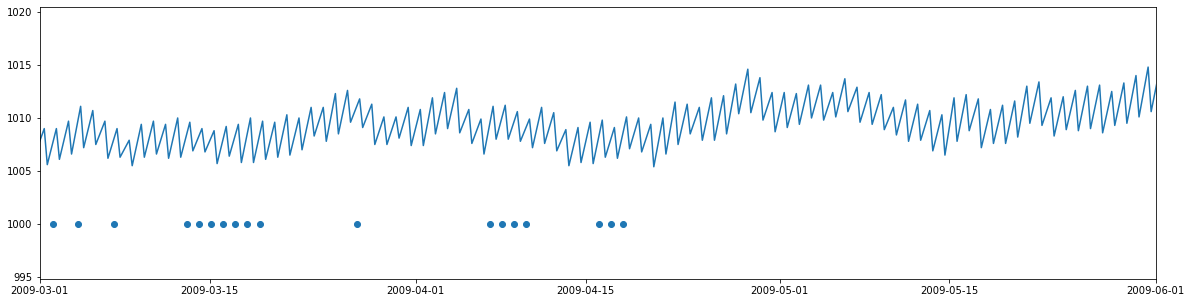

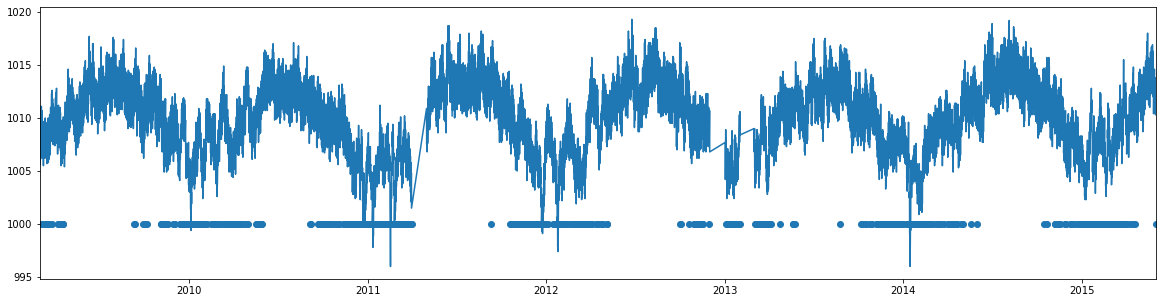

In [59]:
from datetime import date
date.fromisoformat('2008-12-01')

pressure9am=df[df['Location']=='Darwin'][['Date','Pressure9am']]
pressure3pm=df[df['Location']=='Darwin'][['Date','Pressure3pm']]
rain=df[df['Location']=='Darwin'][['Date','RainToday']]

pressure9am['Date']=pressure9am['Date']+pd.DateOffset(hours=9)
pressure3pm['Date']=pressure3pm['Date']+pd.DateOffset(hours=15)
rain['Date']=pressure3pm['Date']+pd.DateOffset(hours=12)
rain=rain[rain['RainToday']>0]
rain['RainToday']=rain['RainToday']*1000

pressure9am.rename(columns={'Pressure9am':'Pressure'},inplace=True)
pressure3pm.rename(columns={'Pressure3pm':'Pressure'},inplace=True)
pressure=pd.concat([pressure9am,pressure3pm]).sort_values('Date')
#pressure=pressure.iloc[0:300,:]
plt.figure(figsize=(20,5))
plt.xlim([date.fromisoformat('2009-03-01'),date.fromisoformat('2009-06-01')])
plt.plot(pressure.Date,pressure.Pressure)
plt.scatter(rain.Date,rain.RainToday)
plt.show()

plt.figure(figsize=(20,5))
plt.xlim([date.fromisoformat('2009-03-01'),date.fromisoformat('2015-06-01')])
plt.plot(pressure.Date,pressure.Pressure)
plt.scatter(rain.Date,rain.RainToday)


AxesSubplot(0.566667,0.155093;0.352778x0.277778)
<class 'int'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 139111 to 142303
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3193 non-null   datetime64[ns]
 1   MaxTemp     3192 non-null   float64       
 2   MinTemp     3192 non-null   float64       
 3   rollavgmax  3163 non-null   float64       
 4   rollavgmin  3134 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 149.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 30176 to 33519
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3344 non-null   datetime64[ns]
 1   MaxTemp     3342 non-null   float64       
 2   MinTemp     3340 non-null   float64       
 3   rollavgmax  3284 non-null   float64       
 4   rollavgmin  3195 non-nu

/tmp/ipykernel_67/220281816.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tempMaxday=tempMax.groupby('dayofyear')['rollavgmax','rollavgmin'].agg('mean')


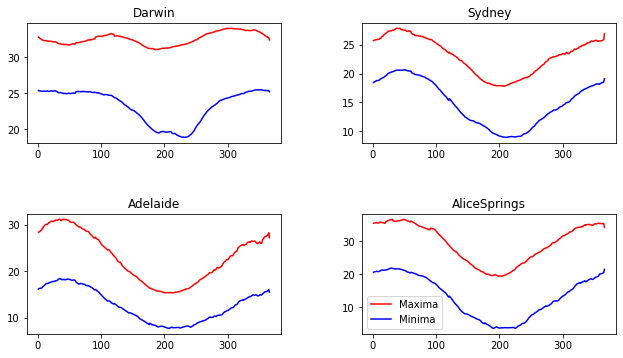

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import bottleneck as bn

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,6))
fig.tight_layout(pad=5)
#plt.subplots_adjust(bottom=1, right=0.8, top=2)
print(axes[1,1])
i=0
print(type(i%2))
for ville in ['Darwin','Sydney','Adelaide','AliceSprings']:
    ax=axes[i//2,i%2]
    tempMax=df[df['Location']==ville][['Date','MaxTemp','MinTemp']]
    tempMax["rollavgmax"]=bn.move_mean(tempMax.MaxTemp,30)
    tempMax["rollavgmin"]=bn.move_mean(tempMax.MinTemp,30)
    tempMax.info()
    tempMax['dayofyear']=tempMax['Date'].apply(lambda x: x.dayofyear)
    tempMaxday=tempMax.groupby('dayofyear')['rollavgmax','rollavgmin'].agg('mean')
    ax.set_title(ville)
    ax.plot(tempMaxday.rollavgmax,label="Maxima",color='r')
    ax.plot(tempMaxday.rollavgmin,label="Minima",color='b')
    #ax.set_xlabel('Jour de l''année')
    i+=1
    
plt.legend()
plt.show()

In [72]:
rain['RainToday']

139111    No
139112    No
139113    No
139114    No
139115    No
          ..
142299    No
142300    No
142301    No
142302    No
142303    No
Name: RainToday, Length: 3193, dtype: object

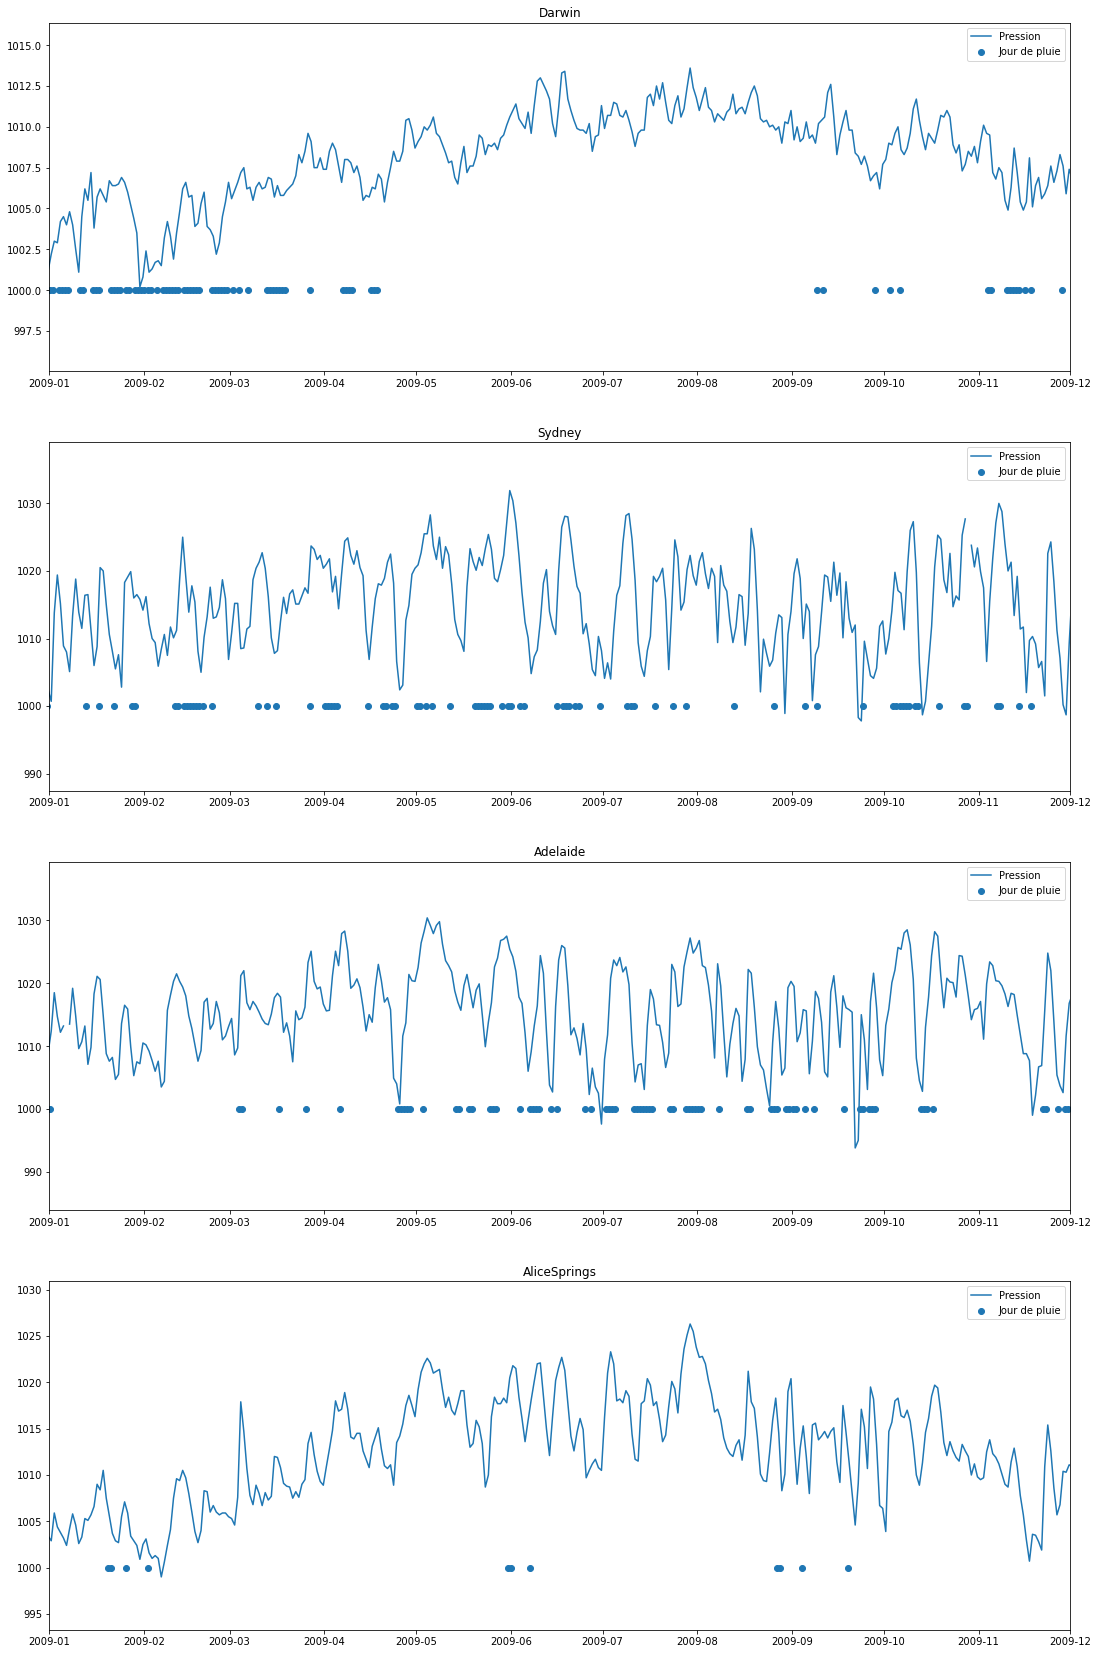

In [87]:
from datetime import date
df['RainToday'].replace({'No': 0}, inplace=True)
df['RainToday'].replace({'Yes': 1}, inplace=True)
df['RainTomorrow'].replace({'No': 0}, inplace=True)
df['RainTomorrow'].replace({'Yes': 1}, inplace=True)
fig, axes = plt.subplots(nrows=4, figsize=(16,24))
fig.tight_layout(pad=5)
i=0
for ville in ['Darwin','Sydney','Adelaide','AliceSprings']:
    ax=axes[i]
    pressure=[]
    pressure3pm=df[df['Location']==ville][['Date','Pressure3pm']]
    rain=df[df['Location']==ville][['Date','RainToday']]
    pressure3pm['Date']=pressure3pm['Date']+pd.DateOffset(hours=15)
    rain['Date']=pressure3pm['Date']+pd.DateOffset(hours=12)
    rain=rain[rain['RainToday']>0]
    rain['RainToday']=rain['RainToday']*1000
    pressure3pm.rename(columns={'Pressure3pm':'Pressure'},inplace=True)
    pressure=pd.concat([pressure3pm]).sort_values('Date')
    ax.set_xlim([date.fromisoformat('2009-01-01'),date.fromisoformat('2009-12-01')])
    ax.plot(pressure.Date,pressure.Pressure,label='Pression')
    ax.scatter(rain.Date,rain.RainToday,label='Jour de pluie')
    ax.set_title(ville)
    ax.legend()    
    i+=1
   

plt.show()


#plt.figure(figsize=(20,5))
#plt.xlim([date.fromisoformat('2009-03-01'),date.fromisoformat('2015-06-01')])
#plt.plot(pressure.Date,pressure.Pressure)
#plt.scatter(rain.Date,rain.RainToday)


<class 'pandas.core.frame.DataFrame'>


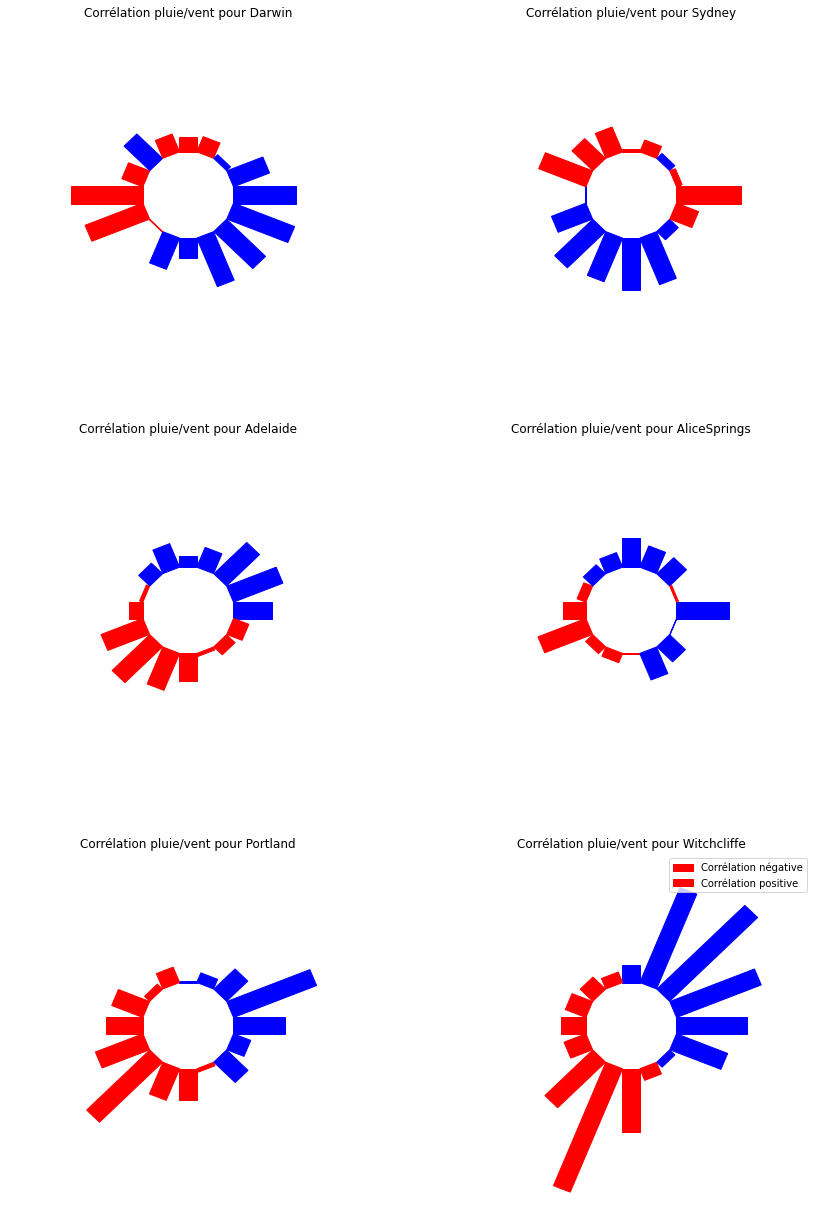

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle 
import matplotlib as mpl

dict={'E':90, 'ENE':68, 'ESE':112, 'N':0, 'NE':45, 'NNE':22, 'NNW':-22, 'NW':-45, 'S':180, 'SE':135, 'SSE':158,
       'SSW':-158, 'SW':-135, 'W':-90, 'WNW':-68, 'WSW':-112}

df['RainToday'].replace({'No': 0}, inplace=True)
df['RainToday'].replace({'Yes': 1}, inplace=True)
df['RainTomorrow'].replace({'No': 0}, inplace=True)
df['RainTomorrow'].replace({'Yes': 1}, inplace=True)





#ax = sns.heatmap(corr)
print(type(bringrain))
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(13,18))
fig.tight_layout(pad=5)
i=0
for ville in ['Darwin','Sydney','Adelaide','AliceSprings','Portland','Witchcliffe']:
    ax=axes[i//2,i%2]
    dffiltered=df.loc[df['Location'] == ville]
    winds=pd.get_dummies(dffiltered['WindGustDir'])
    winds['RainTomorrow']=dffiltered['RainTomorrow']
    corr=winds.corr()
    bringrain=pd.DataFrame(corr.iloc[:-1,-1])
    bringrain.rename(columns={'RainTomorrow':'WindContr'},inplace=True)
    for dirvent,w in bringrain.iterrows():
        force=w.WindContr
        if (force > 0):
            c='b'
        else:
            c='r'
            force=-force
        #rectangle=Rectangle((-.05*np.cos(dict[dirvent]/180*np.pi)-.25*np.sin(dict[dirvent]/180*np.pi), .05*np.cos(dict[dirvent]/180*np.pi)+.25*np.sin(dict[dirvent]/180*np.pi)),.1,6*force, color=c,angle=dict[dirvent])
        rectangle=Rectangle((-.05, .25),.1,3*force, color=c)#,angle=dict[dirvent]
        t2 = mpl.transforms.Affine2D().rotate_deg(dict[dirvent]) + ax.transData
        rectangle.set_transform(t2)
        ax.add_patch(rectangle)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_title("Corrélation pluie/vent pour " + ville)
    ax.axis('off')
    i+=1
plt.legend(['Corrélation négative','Corrélation positive'])
plt.show()

#sns.barplot(ax=ax,x=corr.index[0:-1],y=corr.iloc[:-1,-1],color='b')




In [21]:
bringrain

,WindContr
E,0.002154
ENE,-0.093772
ESE,0.068409
N,-0.005625
NE,-0.054389
NNE,-0.051888
NNW,-0.024732
NW,0.013624
S,0.100258
SE,0.099520
